In [ ]:
!python --version

Python 3.10.12


In [ ]:
!git clone https://github.com/THU-MIG/yolov10.git

Cloning into 'yolov10'...
remote: Enumerating objects: 20329, done.
remote: Counting objects: 100% (2443/2443), done.
remote: Compressing objects: 100% (247/247), done.
remote: Total 20329 (delta 2315), reused 2196 (delta 2196), pack-reused 17886 (from 1)
Receiving objects: 100% (20329/20329), 11.14 MiB | 13.19 MiB/s, done.
Resolving deltas: 100% (14335/14335), done.


In [ ]:
cd yolov10

/content/yolov10


In [ ]:
!pip install .

Processing /content/yolov10
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for ultralytics: filename=ultralytics-8.1.34-py3-none-any.whl size=731411 sha256=b4aafcb31702d8a3cc32908ee5b357ea3a5650ca64641dfa3c7c763ad2b7b426
  Stored in directory: /tmp/pip-ephem-wheel-cache-x13pejk_/wheels/51/93/e8/22d2e815ced343915c15d86b2a00d95eb0a997d012527fbea7
Successfully built ultralytics


In [ ]:
import os
import urllib.request

# Create a directory for the weights in the current working directory
weights_dir = os.path.join(os.getcwd(), "weights")
os.makedirs(weights_dir, exist_ok=True)

# URLs of the weight files
urls = [
    "https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10n.pt",
    "https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10s.pt",
    "https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10m.pt",
    "https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10b.pt",
    "https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10x.pt",
    "https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10l.pt"
]

# Download each file
for url in urls:
    file_name = os.path.join(weights_dir, os.path.basename(url))
    urllib.request.urlretrieve(url, file_name)
    print(f"Downloaded {file_name}")

Downloaded /content/yolov10/weights/yolov10n.pt
Downloaded /content/yolov10/weights/yolov10s.pt
Downloaded /content/yolov10/weights/yolov10m.pt
Downloaded /content/yolov10/weights/yolov10b.pt
Downloaded /content/yolov10/weights/yolov10x.pt
Downloaded /content/yolov10/weights/yolov10l.pt


In [ ]:
!yolo task=detect mode=predict conf=0.25 save=True model=../weights/yolov10n.pt source=/content/test_images/1.jpg

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")
Ultralytics YO

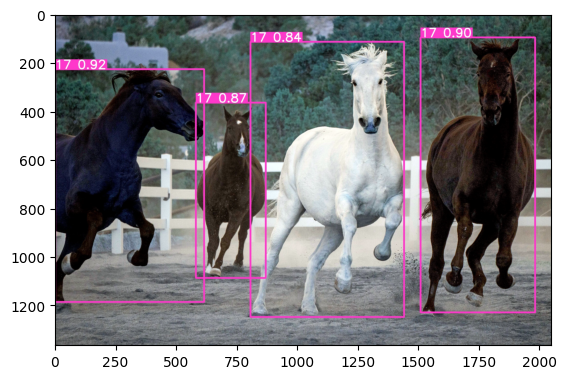

In [ ]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('/content/yolov10/runs/detect/predict/1.jpg')
plt.imshow(img)
plt.show()

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/YOLOv10-Custom-Object-Detection-main.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
!yolo task=detect mode=train epochs=100 batch=16 plots=True model=weights/yolov10n.pt data=/content/custom_data.yaml

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")
New https://py

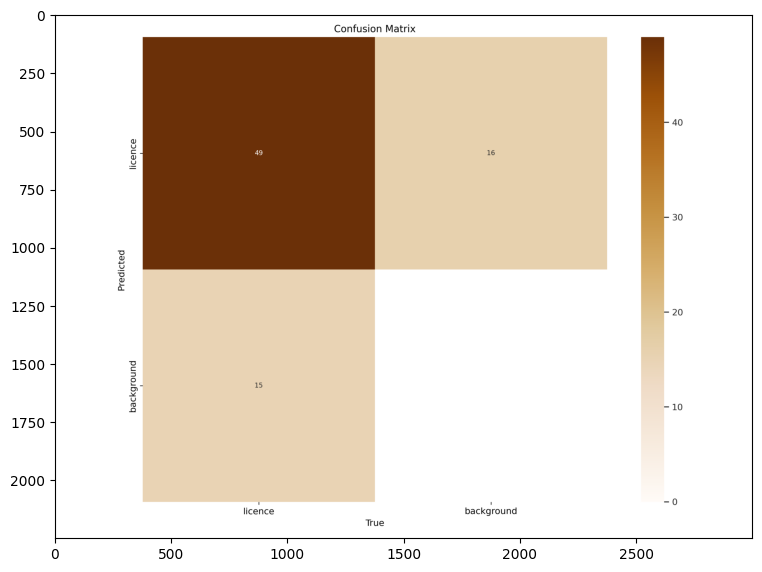

In [ ]:
plt.figure(figsize=(9,9))
cm=cv2.imread('/content/yolov10/runs/detect/train/confusion_matrix.png')
plt.imshow(cm)
plt.show()

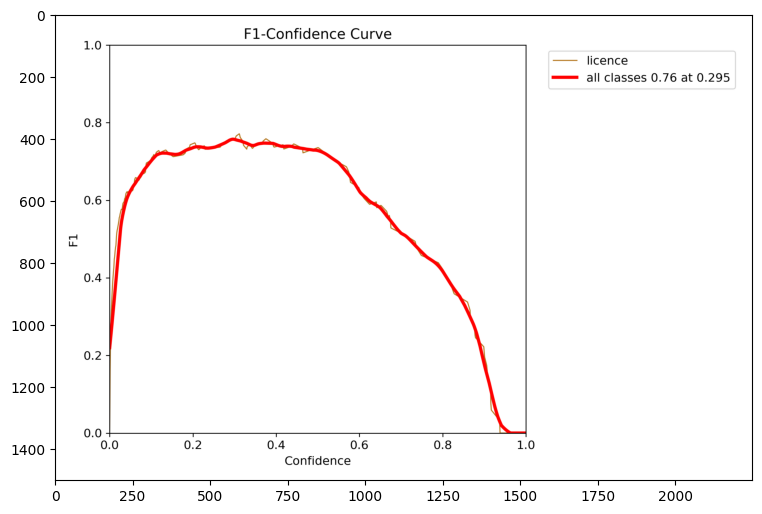

In [ ]:
plt.figure(figsize=(9,9))
f1_curve = cv2.imread('/content/yolov10/runs/detect/train/F1_curve.png')
plt.imshow(f1_curve)
plt.show()

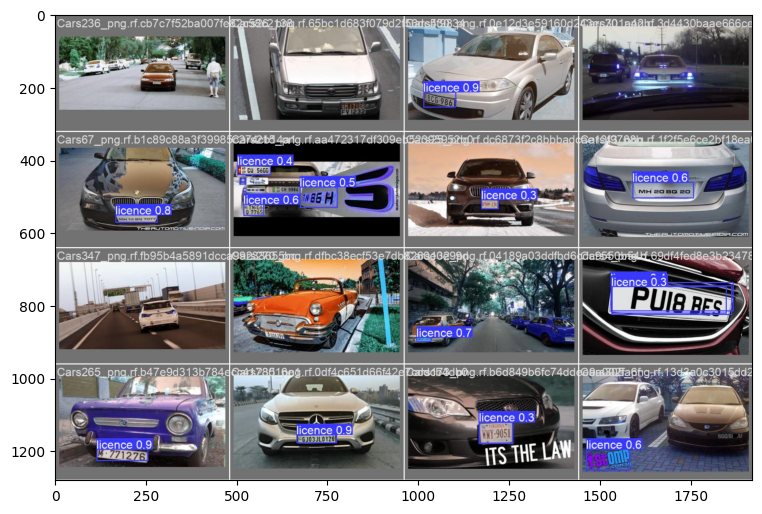

In [ ]:
plt.figure(figsize=(9,9))
val_batch=cv2.imread('/content/yolov10/runs/detect/train/val_batch0_pred.jpg')
plt.imshow(val_batch)
plt.show()

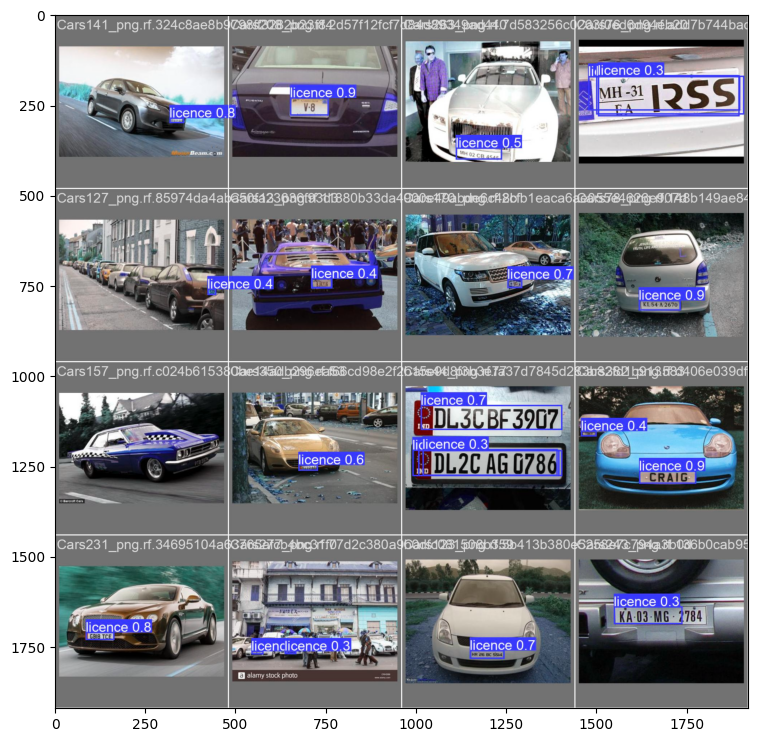

In [ ]:
plt.figure(figsize=(9,9))
val_batch=cv2.imread('/content/yolov10/runs/detect/train/val_batch1_pred.jpg')
plt.imshow(val_batch)
plt.show()

In [ ]:
import pandas as pd
df=pd.read_csv('/content/yolov10/runs/detect/train/results.csv')
df

,epoch,train/box_om,train/cls_om,train/dfl_om,train/box_oo,train/cls_oo,train/dfl_oo,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_om,val/cls_om,val/dfl_om,val/box_oo,val/cls_oo,val/dfl_oo,lr/pg0,lr/pg1,lr/pg2
0,1,1.56890,3.51780,1.38670,1.51920,7.59560,1.27040,0.00261,0.73438,0.19873,0.12639,1.4865,3.87750,1.2099,1.2462,10.43800,1.0815,0.000260,0.000260,0.000260
1,2,1.51250,2.47130,1.28910,1.39350,6.68160,1.16890,0.00261,0.73438,0.12803,0.06827,1.5628,4.00230,1.3233,1.3025,10.45700,1.1277,0.000535,0.000535,0.000535
2,3,1.57360,2.19010,1.32060,1.40570,5.84560,1.18110,0.00217,0.60938,0.11831,0.04925,1.4778,4.05320,1.3336,1.3366,10.64100,1.3088,0.000804,0.000804,0.000804
3,4,1.66990,2.25780,1.35610,1.49300,5.61200,1.24460,0.00217,0.60938,0.07887,0.03206,1.6789,3.88020,1.5885,1.5838,10.36400,1.3838,0.001067,0.001067,0.001067
4,5,1.60910,2.17890,1.40490,1.50150,5.61040,1.31060,0.31593,0.12500,0.10899,0.04039,1.7405,3.78490,1.7453,1.6656,10.20000,1.5883,0.001325,0.001325,0.001325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0.83791,0.53076,0.95952,0.90344,0.61292,0.94829,0.77882,0.78125,0.79280,0.41860,1.5757,0.86148,1.4346,1.6705,1.00060,1.4191,0.000139,0.000139,0.000139
96,97,0.78374,0.50582,0.94877,0.84661,0.61660,0.95291,0.79992,0.76562,0.80984,0.41651,1.5936,0.86057,1.4345,1.6922,0.99370,1.4282,0.000119,0.000119,0.000119
97,98,0.76781,0.52059,0.95054,0.80535,0.62696,0.94478,0.83724,0.72344,0.81588,0.41457,1.5898,0.84177,1.4324,1.7120,0.96875,1.4280,0.000099,0.000099,0.000099
98,99,0.78096,0.50674,0.97932,0.83146,0.54911,0.97979,0.81729,0.76885,0.82256,0.41044,1.5806,0.82835,1.4289,1.6973,0.98540,1.4087,0.000079,0.000079,0.000079


In [ ]:
!yolo task=detect mode=predict conf=0.25 save=True model=/content/yolov10/runs/detect/train/weights/best.pt source=/content/custom_dataset/dataset/test/images/Cars100_png.rf.59ab65fb1cd60b07568305c878ab6b58.jpg

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")
Ultralytics YO

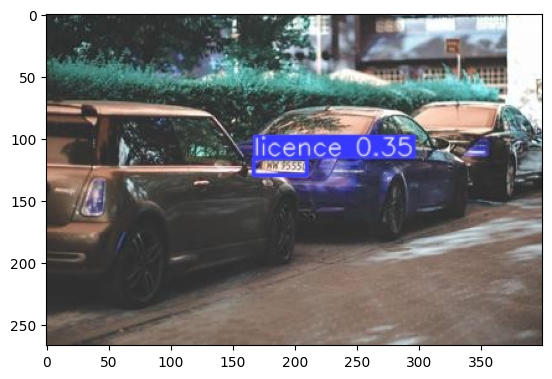

In [ ]:
predicted=cv2.imread('/content/yolov10/runs/detect/predict3/Cars100_png.rf.59ab65fb1cd60b07568305c878ab6b58.jpg')
plt.imshow(predicted)
plt.show()

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
%cd /content/custom_dataset

/content/custom_dataset


In [53]:
!zip -r custome_dataset.zip /content/yolov10

  adding: content/yolov10/ (stored 0%)
  adding: content/yolov10/tests/ (stored 0%)
  adding: content/yolov10/tests/test_cli.py (deflated 66%)
  adding: content/yolov10/tests/test_cuda.py (deflated 67%)
  adding: content/yolov10/tests/test_explorer.py (deflated 71%)
  adding: content/yolov10/tests/test_integrations.py (deflated 68%)
  adding: content/yolov10/tests/conftest.py (deflated 59%)
  adding: content/yolov10/tests/test_python.py (deflated 69%)
  adding: content/yolov10/tests/test_engine.py (deflated 79%)
  adding: content/yolov10/.pre-commit-config.yaml (deflated 60%)
  adding: content/yolov10/CONTRIBUTING.md (deflated 57%)
  adding: content/yolov10/models.zip (stored 0%)
  adding: content/yolov10/examples/ (stored 0%)
  adding: content/yolov10/examples/hub.ipynb (deflated 63%)
  adding: content/yolov10/examples/YOLOv8-Region-Counter/ (stored 0%)
  adding: content/yolov10/examples/YOLOv8-Region-Counter/yolov8_region_counter.py (deflated 68%)
  adding: content/yolov10/examples/Y

In [49]:
%ls /content/yolov10

app.py           docs/      LICENSE     pyproject.toml    tests/
build/           examples/  logs/       README.md         ultralytics/
CONTRIBUTING.md  figures/   mkdocs.yml  requirements.txt  ultralytics.egg-info/
docker/          flops.py   models.zip  runs/             weights/


In [55]:
from google.colab import files
files.download('custome_dataset.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>